## Import lib

In [1]:
from pyMSOO.MFEA.model import MFEA_base, SM_MFEA, LSA21
from pyMSOO.MFEA.competitionModel import SM_MFEA_Competition, MFEA_Multiparent
from pyMSOO.utils.Crossover import *
from pyMSOO.utils.Mutation import *
from pyMSOO.utils.Selection import *
from pyMSOO.utils.Search import * 
from pyMSOO.MFEA.benchmark.continous import *
from pyMSOO.utils.MultiRun.RunMultiTime import * 

from pyMSOO.utils.EA import * 
from pyMSOO.MFEA.benchmark.continous.CEC17 import CEC17_benchmark 
from pyMSOO.MFEA.benchmark.continous.WCCI22 import WCCI22_benchmark
from pyMSOO.MFEA.benchmark.continous.funcs import * 

from pyMSOO.utils.MultiRun.RunMultiTime import * 
from pyMSOO.utils.MultiRun.RunMultiBenchmark import * 
from pyMSOO.utils.Compare.compareModel import CompareModel

from pyMSOO.utils.LoadSaveModel.load_utils import loadModel, loadModelFromTxt

from pyMSOO.utils.numba_utils import *

from pyMSOO.utils.Compare.utils import render_cec_17

## Compare model

### Convergence trend

3


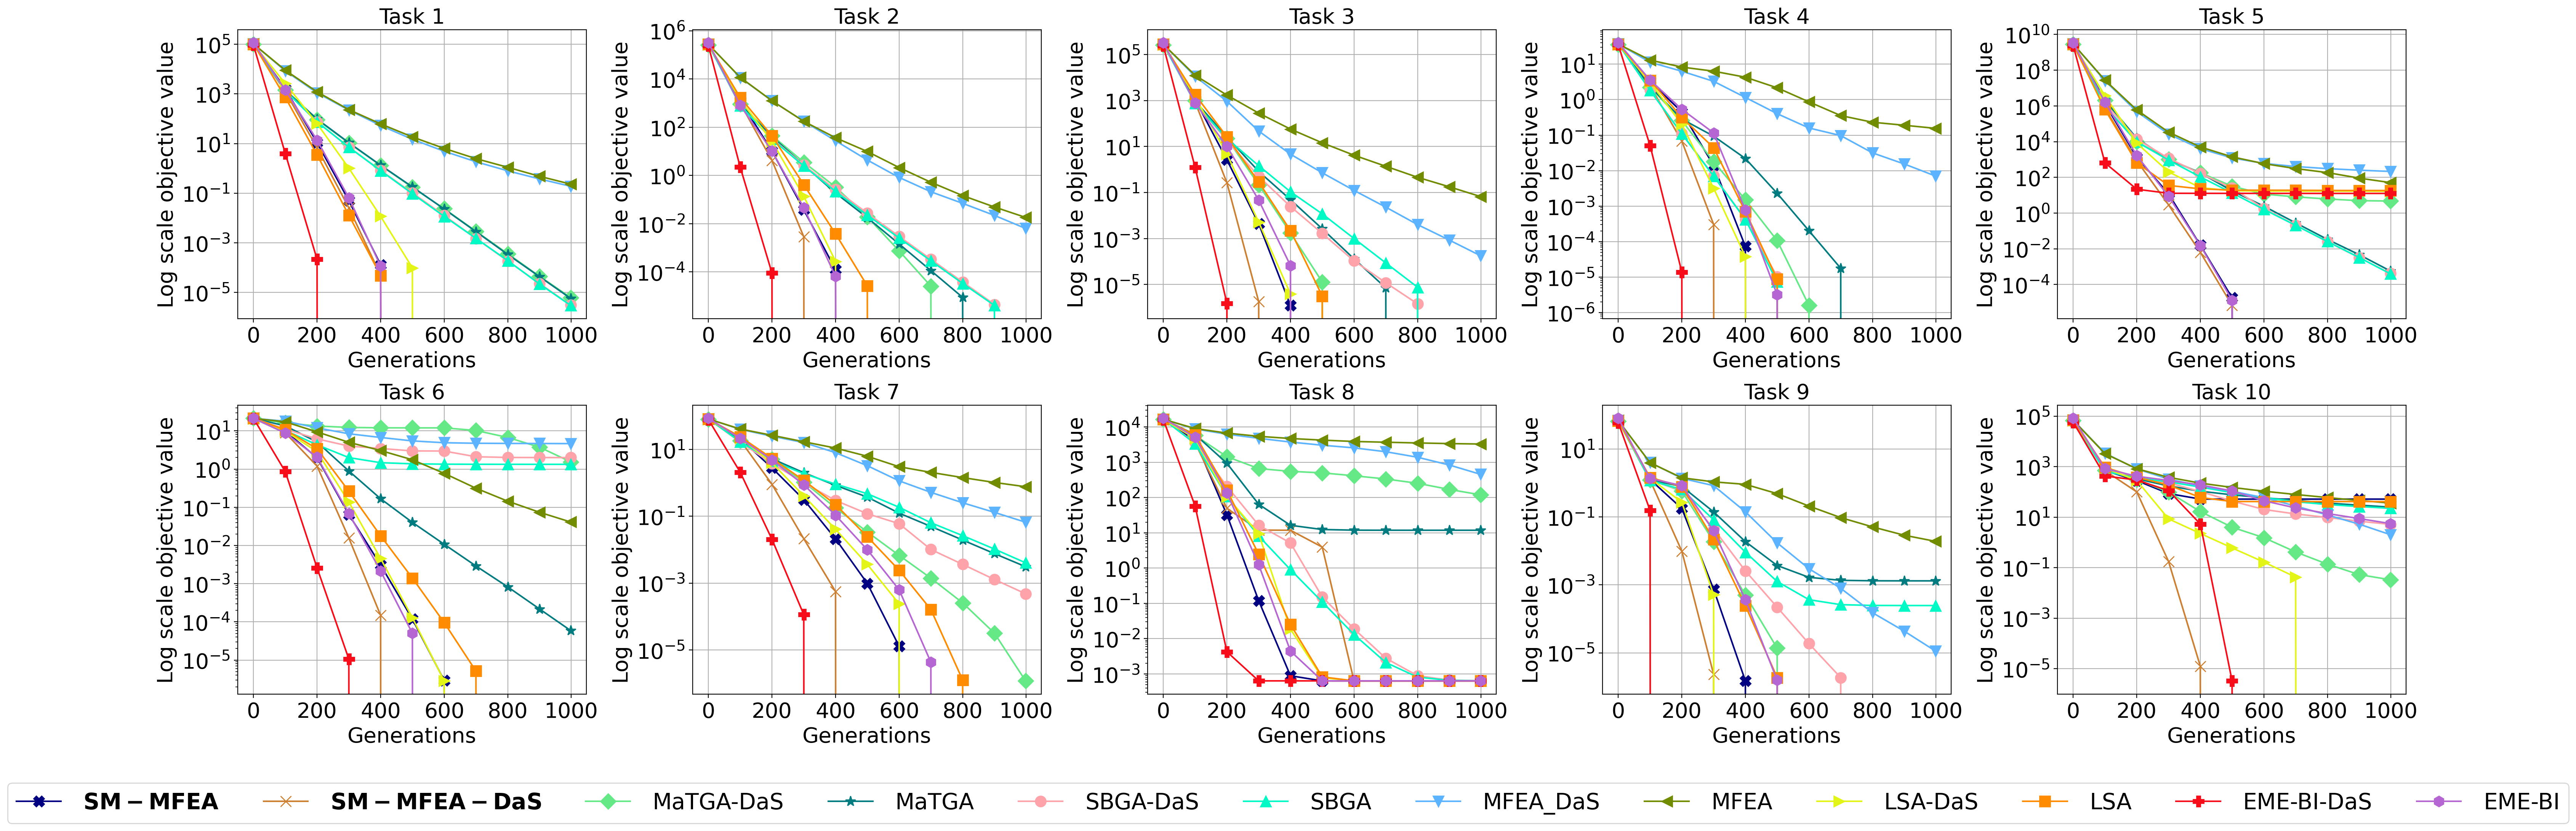

In [2]:

fig = render_cec_17(
    ls_model=[
            loadModel("./Data/convergence_trend_das/S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/MaTGA_w_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/MaTGA_wo_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/SBSGA_w_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/SBSGA_wo_DaSCEC17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/MFEA_KL_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/MFEA_SBX_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/LSA_KL_CEC17_PYTHON_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("./Data/convergence_trend_das/LSA_SBX_CEC17_JAVA_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("/home/anhdt-tungdv/pyMSOO/RESULTS/CEC17/EME_BIwDaS2.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
            loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend/EME-BI.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),

    ],
    ls_label= [ '$\\bf{SM-MFEA}$', '$\\bf{SM-MFEA-DaS}$', "MaTGA-DaS", 'MaTGA', 'SBGA-DaS', 'SBGA', 'MFEA_DaS', 'MFEA', "LSA-DaS", "LSA","EME-BI-DaS", "EME-BI"] 
)

# render_cec_17(
#     ls_model=[
#         loadModel("RESULTS/result/GECCO20/check/SMP_MFEA_050623/sm_mfea.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#         loadModel("RESULTS/result/GECCO20/check/SMP_MFEA_multiparent_050623/multiparent_eta_15_stuck_5.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]).ls_model[0],
#         # loadModel("./RESULTS/result/GECCO20/check/MFEA_multiparent/multiparent-2023-5-30-15-11.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
#     ],
#     ls_label=['das', '3-parent'],
#     min_cost= 0
# )
print()


### Compare final result 

In [4]:
path = "./RESULTS/MaTGA/"
compare = CompareModel() 

print(os.listdir(path))

['MaTGA_w_DaS', 'MaTGA']


In [ ]:
compare.summarizing_compare_result(
    path= path, 
    idx_main_algo= 0, 
    min_value= 1e-6, 
    nb_task = 50, 
    ls_benchmark= [WCCI22_benchmark.get_50tasks_benchmark(i)[0] for i in range(1, 11)]
)

## Run Model

In [6]:
ls_benchmark = []
ls_IndClass = []
ls_tasks = [1]
name_benchmark = [] 

for i in ls_tasks:
    # t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(str(i))


smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SM_MFEA
)

smpModel.compile( 
    crossover = SBX_Crossover(nc = 2),
    mutation = PolynomialMutation(nm = 5, pm= 1),
    selection= ElitismSelection(random_percent= 0),
    search= L_SHADE(len_mem= 15),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 20,
    lr = 0.1, p_const_intra= 0., prob_search = 0., lc_nums = 200,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,     
    save_path= './RESULTS/'
)

Seed: 0 -- Time: 00m 5.80s   16 % [===>                ]  Pop_size: 1.74E+02  ,  Cost: 6.24E+02  6.28E+02  ,  

KeyboardInterrupt: Saved model, model is not Done


Traceback (most recent call last):
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/utils/MultiRun/RunMultiTime.py", line 202, in run
    model.fit(*self.args, **self.kwargs)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/MFEA/model/SM_MFEA.py", line 220, in fit
    offsprings.__addIndividual__(ob)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/utils/EA.py", line 394, in __addIndividual__
    self.ls_subPop[individual.skill_factor].__addIndividual__(individual, update_rank)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/utils/EA.py", line 180, in __addIndividual__
    individual.fcost = self.task(individual.genes)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/MFEA/benchmark/continous/WCCI22.py", line 265, in __call__
    return self.fnceval(x)
  File "/home/anhdt-minhdt/Code/docker/pyMSOO/pyMSOO/MFEA/benchmark/continous/WCCI22.py", line 261, in fnceval
    return __class__.func(x,self.func_id,self.dim)
KeyboardInterrupt


## Load Model 

In [2]:
a = loadModel("./RESULTS/result/GECCO20/check/SMP_MFEA_multiparent_050623/multiparent_eta_15e-1.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(3)[0])

In [12]:
a = loadModel("RESULTS/result/GECCO20/check/SMP_MFEA_multiparent_050623/multiparent_eta_15e-1.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0],
              set_attribute= True)

In [3]:
# a.render_smp()

In [5]:
model.history_cost[-1]

[1.1174773255705124e-09,
 5.196318109887063e-08,
 1.564563198655375e-08,
 0.001668385097467251,
 46.09645015124334,
 5.919249110108993e-05,
 0.007139925832461813,
 3841.4227470604164,
 2.908278062818681e-10,
 2.249852400382224e-06]

In [6]:
np.where(a.history_cost[-1][:, 4] > 1e-6)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [15]:
print(a.history_cost[-1])

[4.19172527e-09 6.84756866e-08 1.99406875e-08 1.45642809e-03
 1.05631540e+01 2.66755052e+00 6.66916949e-03 2.74262123e+03
 3.06775516e-10 3.42241401e-06]


In [14]:
for i, model in enumerate(a.ls_model): 
    # print(i,model.history_cost[-1])
    if  model.history_cost[-1][4] > 1: 
        print(i, model.history_cost[-1])

10 [9.919464923256823e-10, 5.025951501013967e-08, 2.2894957286883147e-09, 0.0005940576544674059, 98.93191792733785, 6.38092446618721e-05, 0.003927009552569416, 0.0006364909131661989, 1.1186218618064458e-10, 1.6584489799242874e-06]
12 [8.924320250738419e-09, 1.2205408865321669e-07, 1.6482817115897596e-08, 0.001933364584495223, 36.912881753038604, 9.830889381889918e-05, 0.0074501689652208825, 3911.4763660288227, 7.765338372323072e-10, 5.28723410297971e-06]
13 [8.744895675803835e-10, 1.2556674478672574e-08, 4.506250374675395e-09, 0.0010227559064759362, 45.928884823372826, 3.08178134074133e-05, 0.004747318693858915, 4224.34748623447, 9.502221232082775e-11, 4.485207227844512e-07]
19 [1.8590302695930767e-09, 2.225076574171853e-09, 2.5677598705105907e-08, 0.002744095793026702, 45.209164866991955, 1.4394345836610256e-05, 0.00904851498043513, 4334.760540240695, 1.5007384224219322e-10, 1.0766274840534606e-06]
25 [1.5010559446913045e-08, 5.152124136503e-09, 5.586421298445612e-08, 0.00367547404235

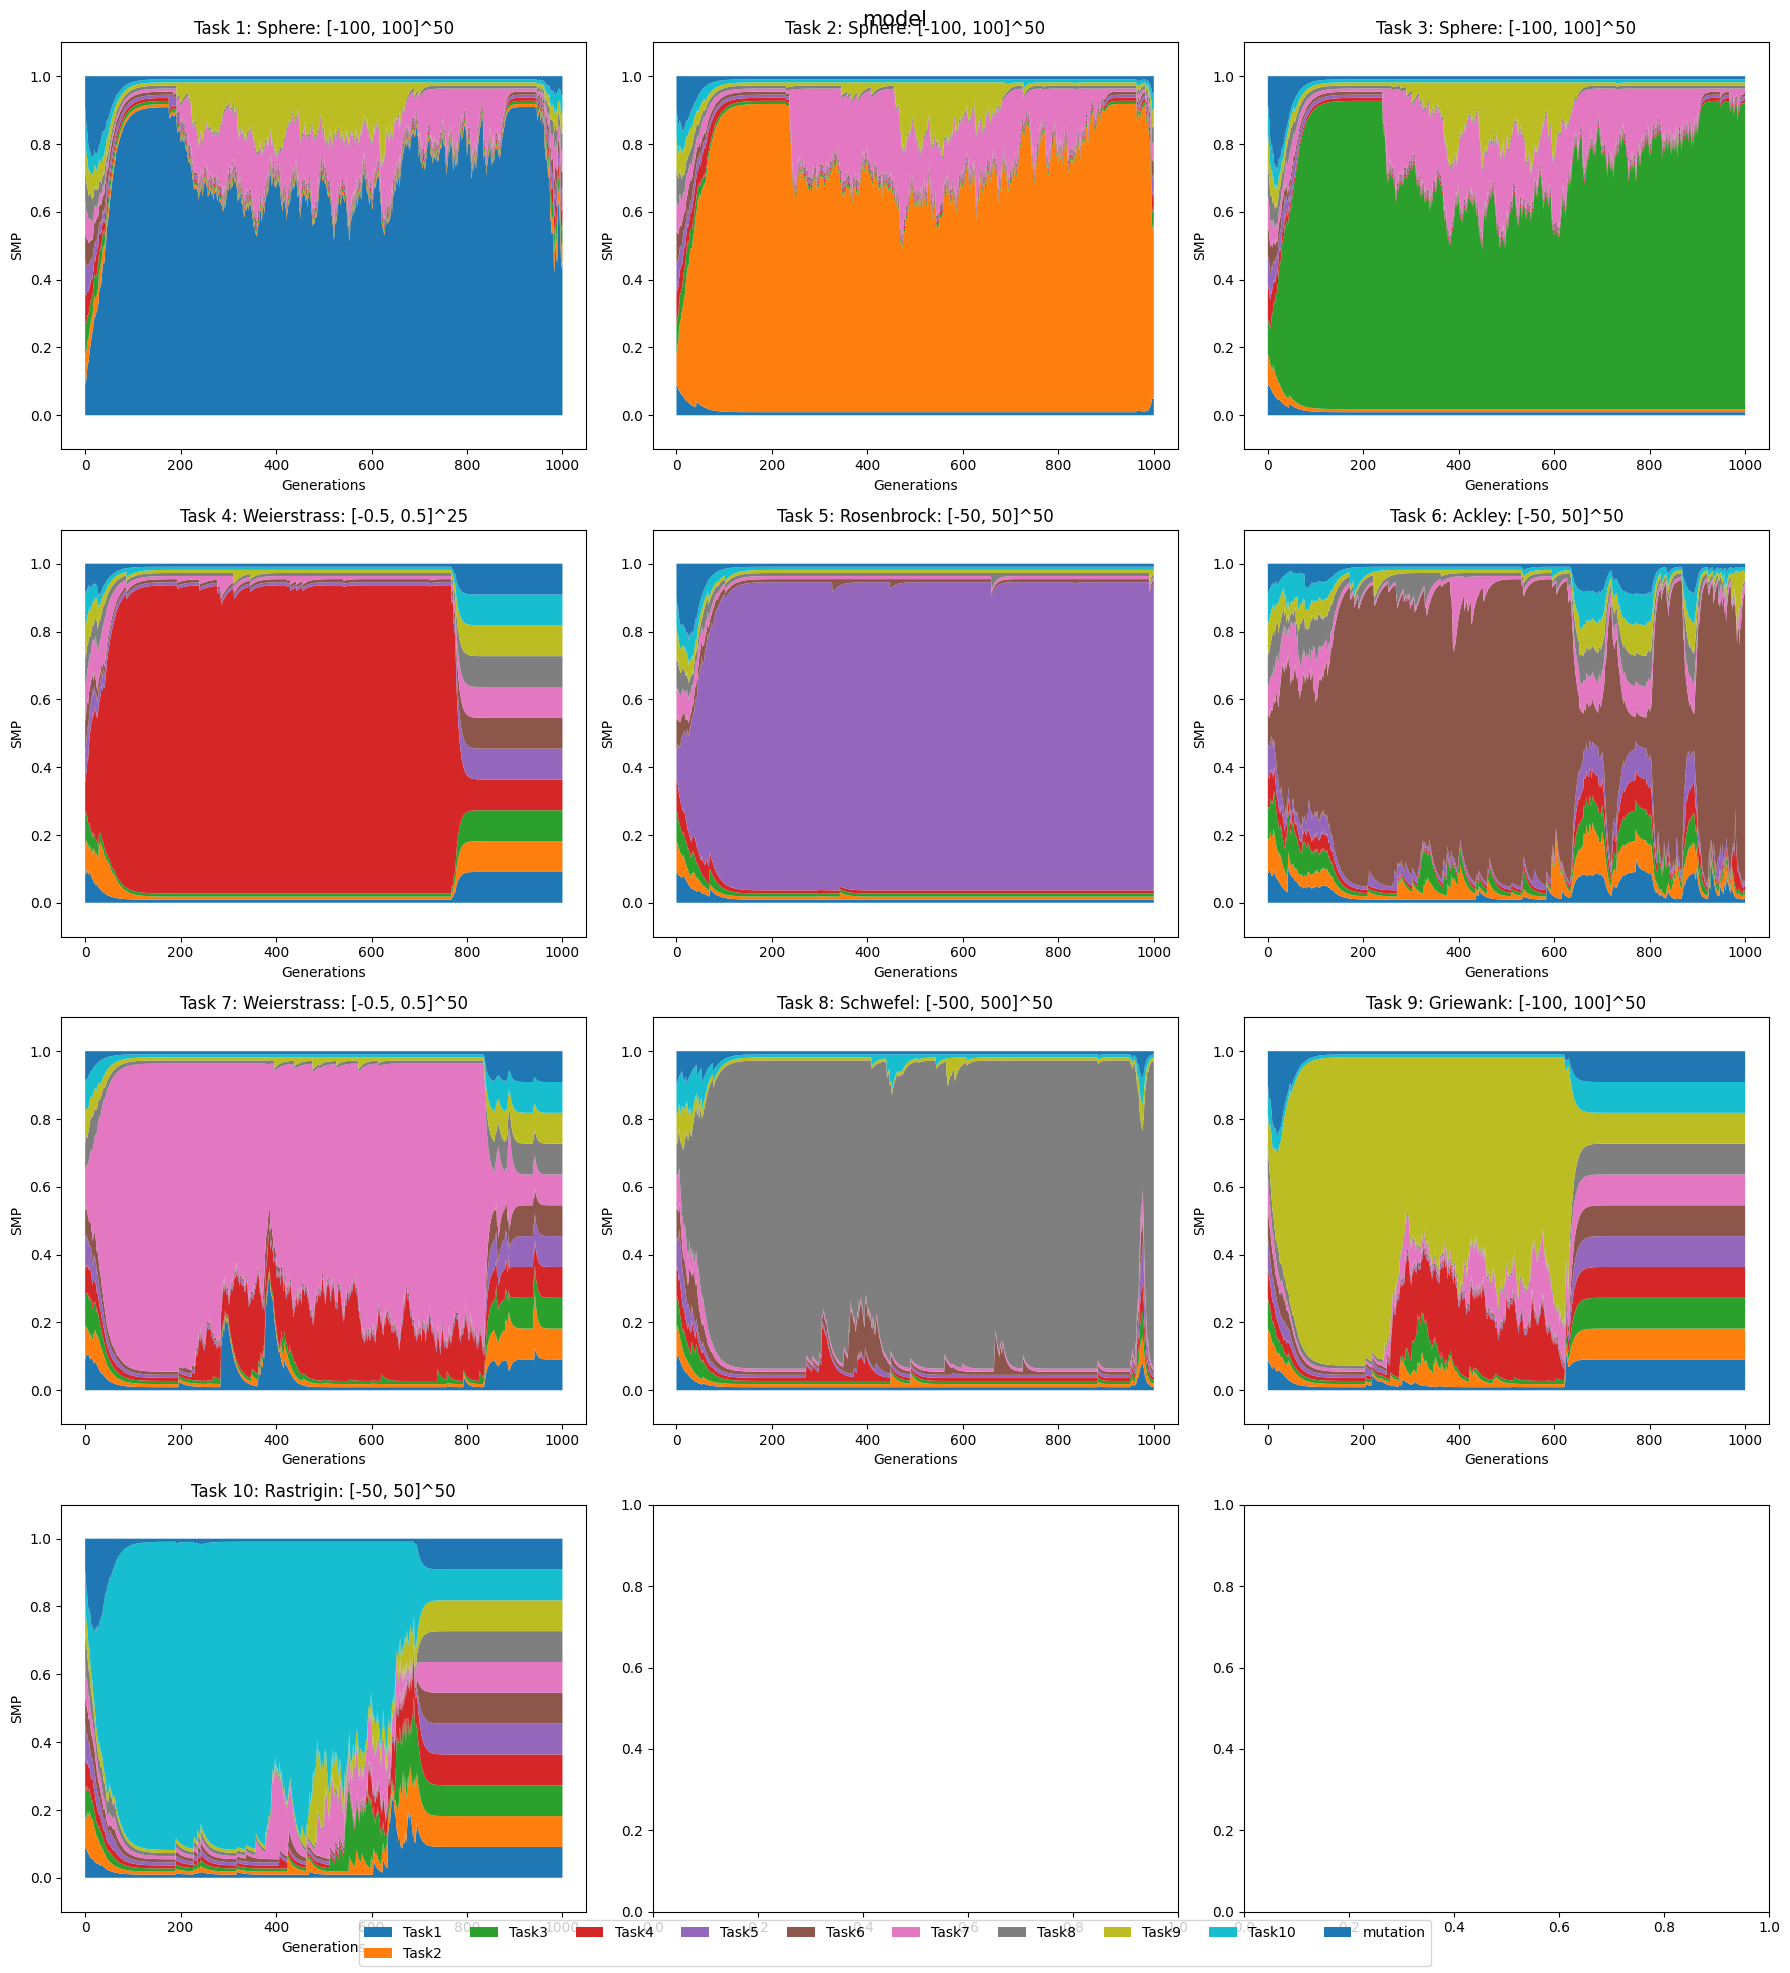

In [13]:
a.ls_model[0].render_smp()

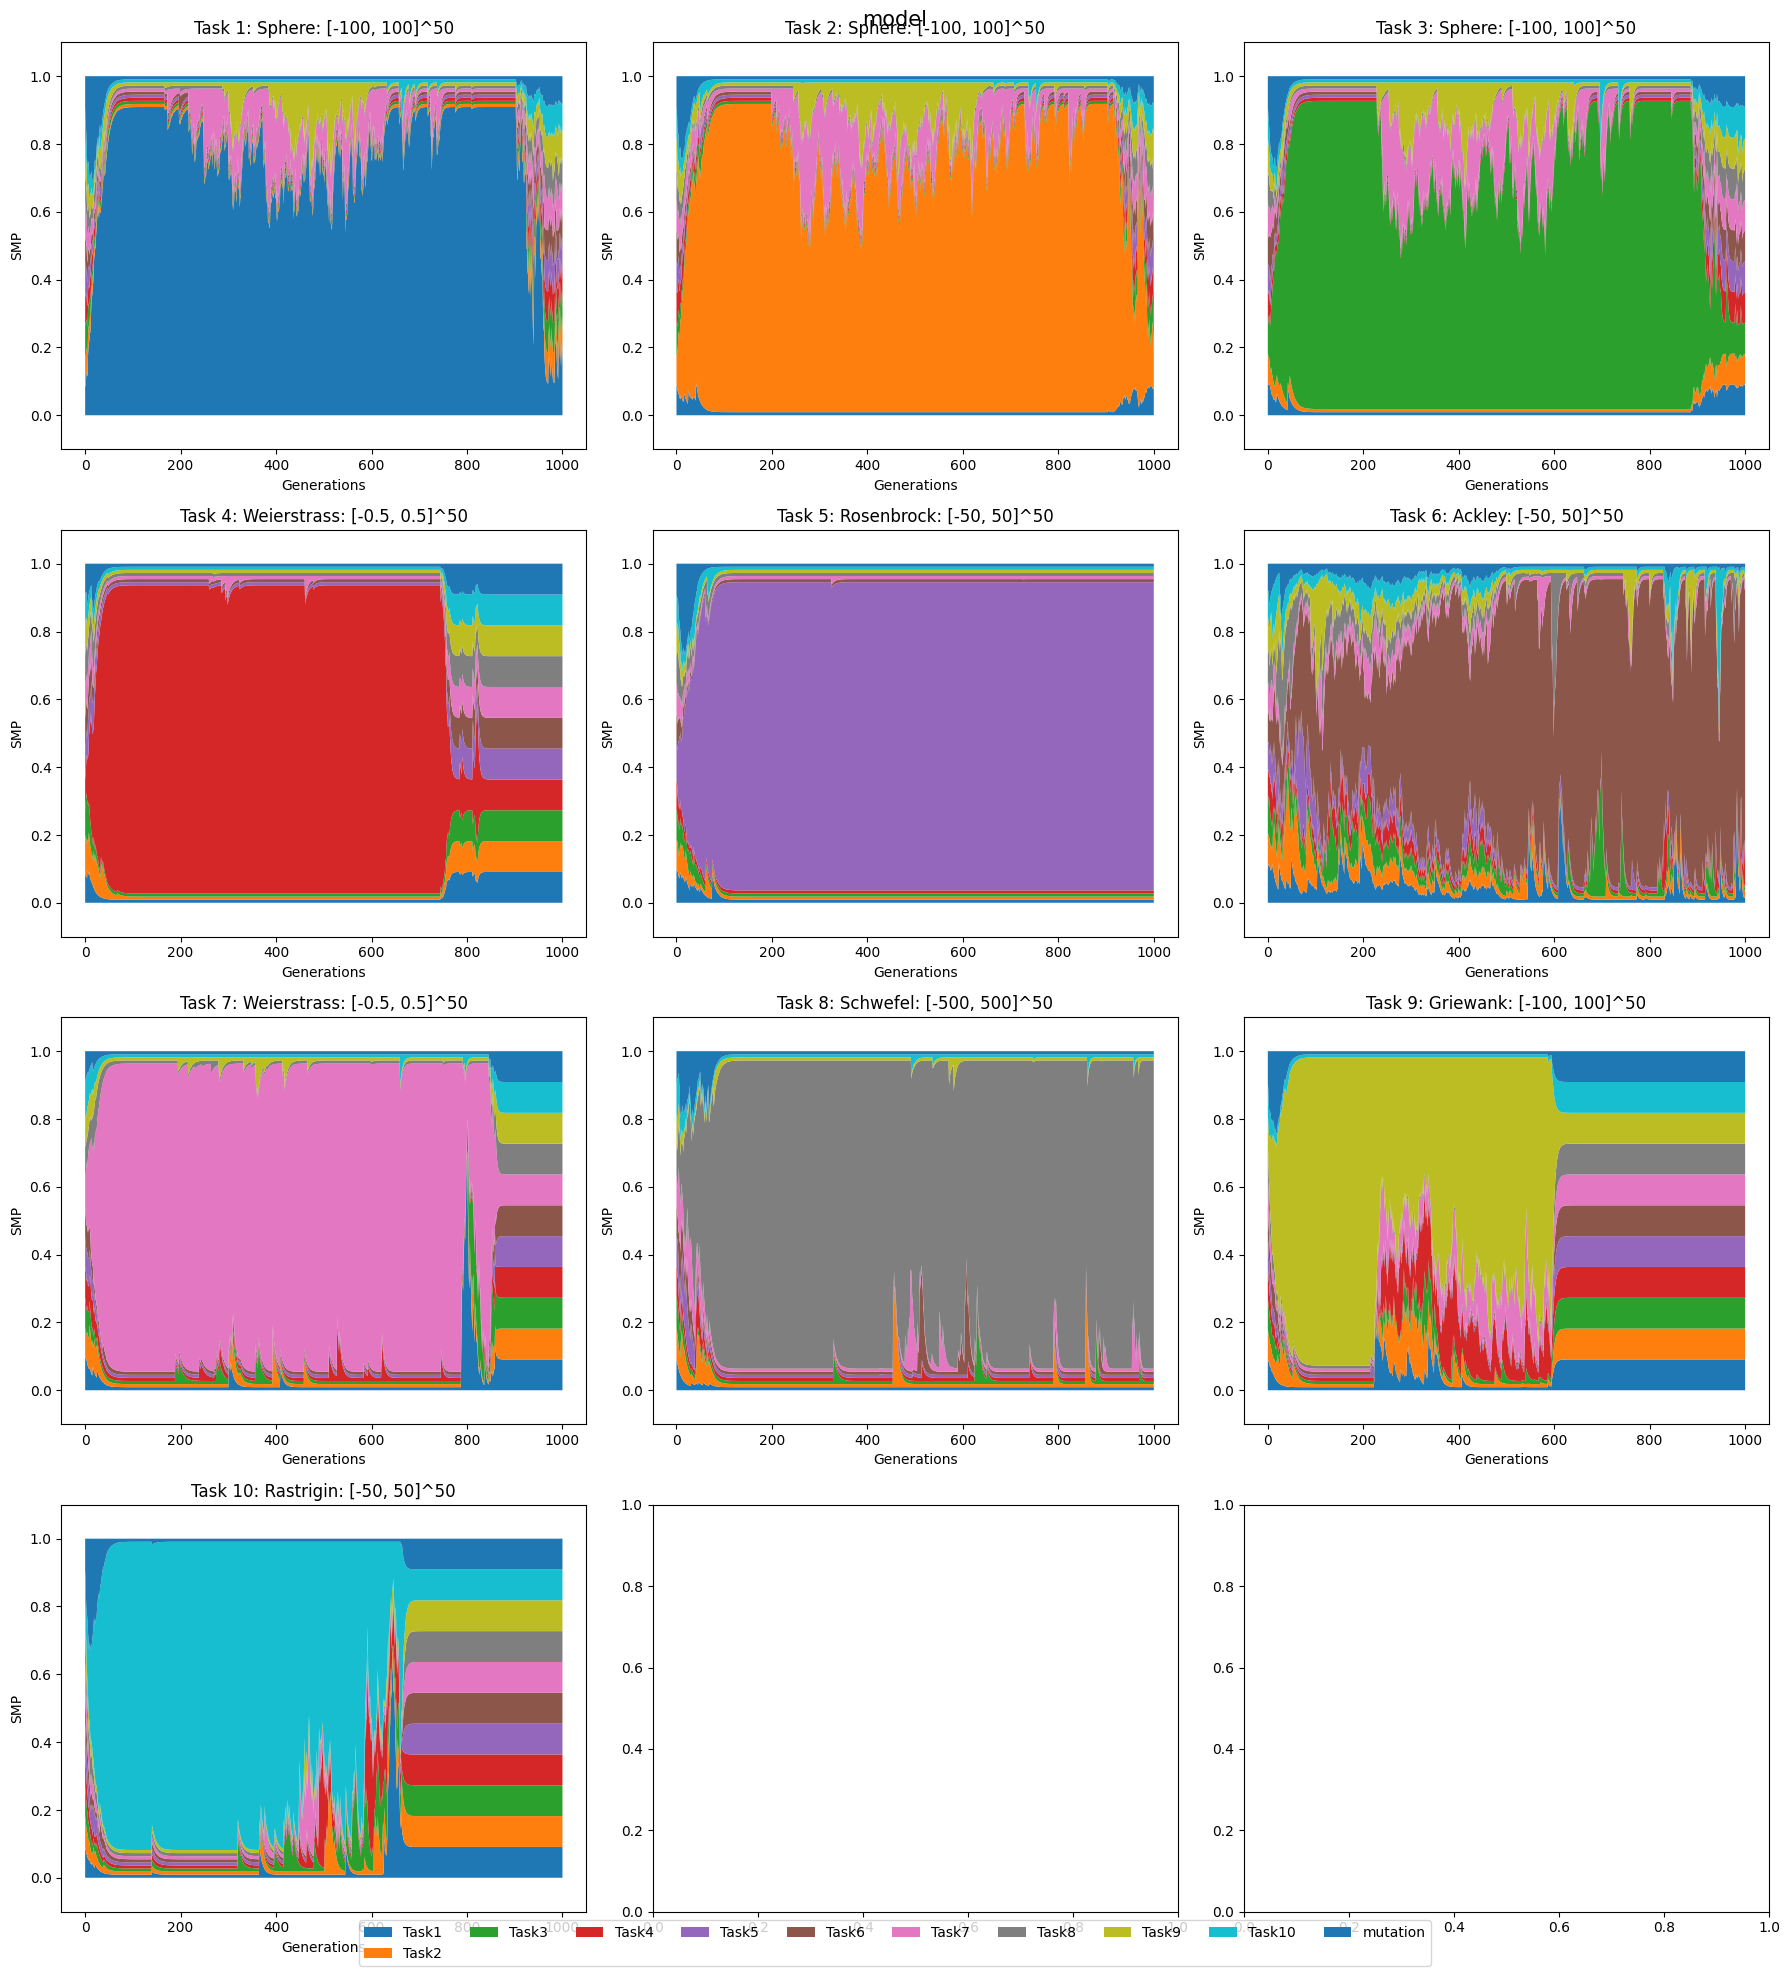

In [4]:
a.ls_model[0].render_smp()

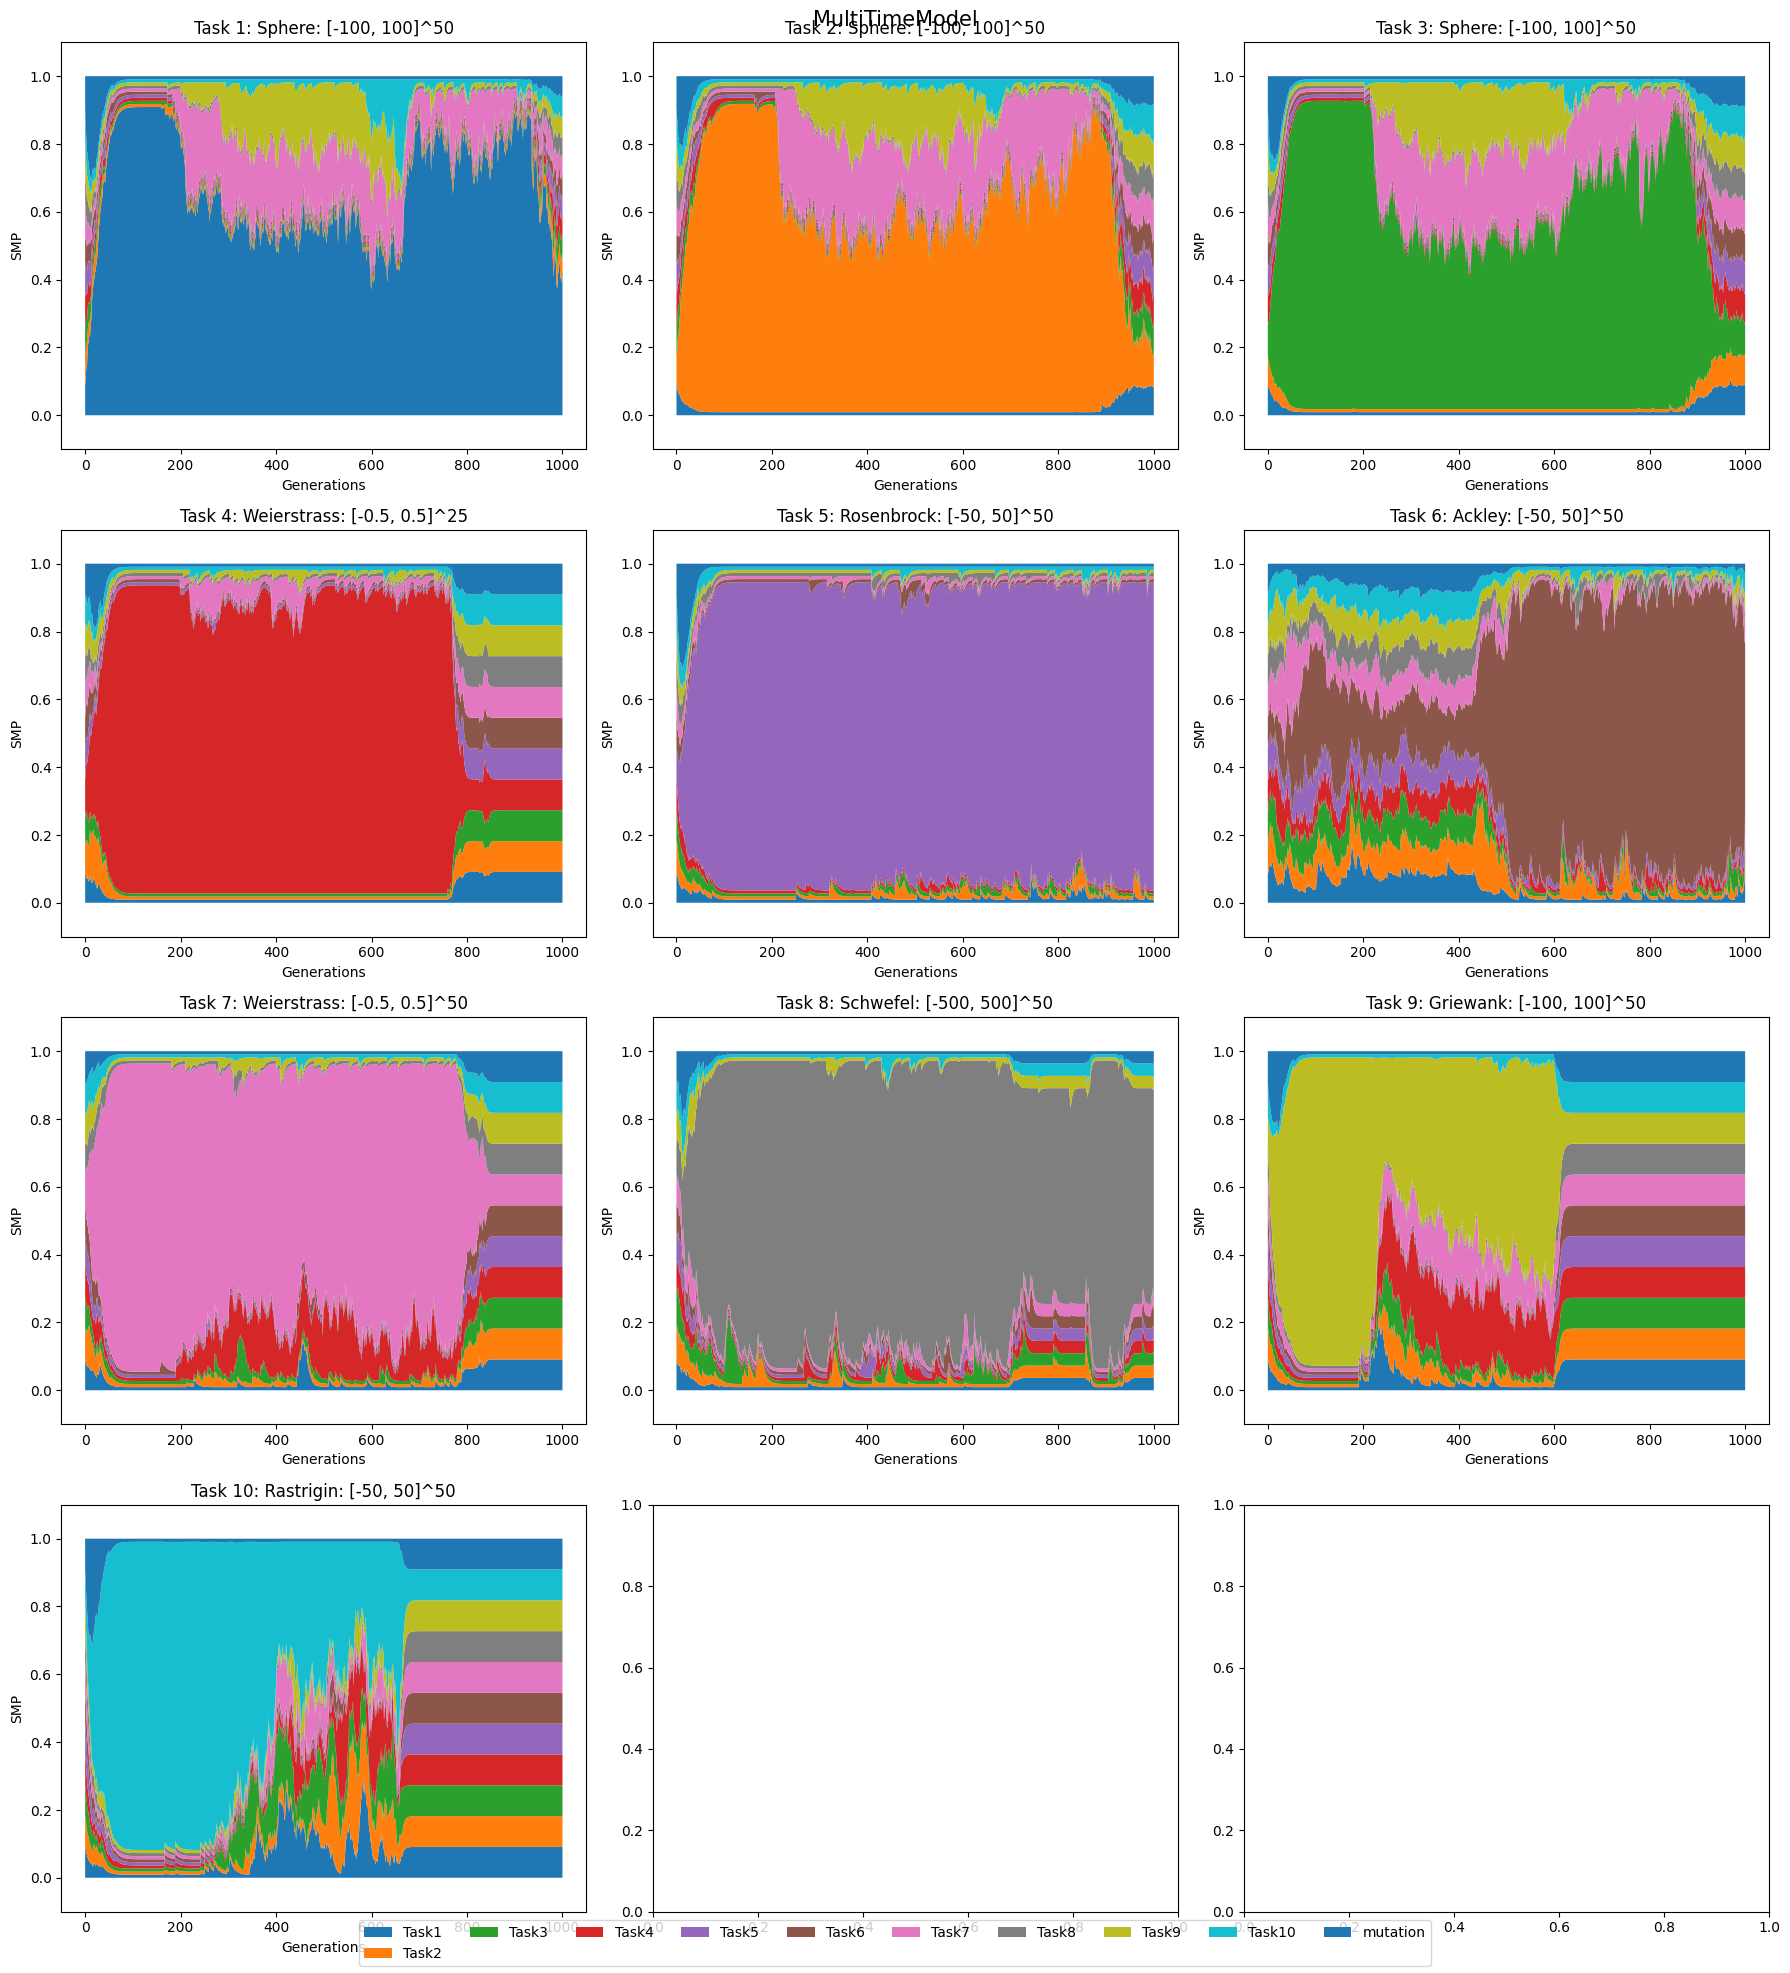

In [14]:
a.render_smp()

In [36]:
print(a.ls_model[22].history_cost[-1])
# a.ls_model[20] = a.ls_model[28]

[2910.8760596245365, 3.952393967665557e-14, 39.798342132457606, 1.0702672081919218e-10, 11.596737138980444, 2533.7078835476727, 3.241851231905457e-14, 366.57619085002534, 9.699518965788911e-11, 19.965034680620306, 139.24094557217987, 1.4925394253850754e-11, 375.41632379625185, 9.198641848229272e-12, 10.645926347965144, 2725.878183888494, 3.97237798210881e-12, 52.73277960231559, 1.4796497360691774e-11, 15.657114104755536, 47.0400800736, 9.180656235230344e-12, 64.88527103498183, 1.6386558776559923e-11, 21.797561477227788, 7105.481482764052, 1.2442047392369204e-11, 365.5959065082801, 1.607036725914668e-11, 17.903068350561966, 634.9971597748803, 2.886579864025407e-14, 54.819214607314336, 2.6524338281319615e-11, 11.049401148851743, 153.65473569302486, 1.9229062786507711e-13, 42.1990893785233, 4.308303713784767e-10, 9.282979746125918, 459.71261805485216, 2.2812862709997717e-12, 48.13870701030356, 2.7091551224600607e-11, 23.533031674107036, 47.57171643817977, 1.475486399726833e-11, 45.3980056

In [59]:
del a.ls_model[2]

In [35]:
a.ls_model[2] = a.ls_model[]

In [60]:
a.history_cost = np.average([a.ls_model[i].history_cost for i in range(len(a.ls_model))], axis=0)
print(a.__class__)
a.__class__ = MultiTimeModel 
print(a.history_cost.shape)
saveModel(a, f"RESULTS2/compare_old_vs_new/SMP_MFEA_multiparent_020623/8.mso", remove_tasks= True)


<class 'pyMSOO.utils.LoadSaveModel.load_utils.MultiTimeModel'>
(1001, 50)


'Saved'

In [29]:
print(a.history_cost[-1])

[1.51099548e+02 2.46535169e-04 6.30446124e+03 2.77397321e+02
 6.13644036e-10 6.68502562e+03 9.32698361e+01 5.74210738e-04
 6.12960184e+03 2.66727698e+02 3.51746406e-10 6.46662231e+03
 7.35141135e+01 4.92661358e-04 6.42964954e+03 2.27717696e+02
 2.02204089e-09 6.39456031e+03 4.68866818e+01 2.46535082e-04
 6.57033233e+03 3.41735424e+02 4.10699793e-04 6.39785070e+03
 1.42875032e+02 2.97236676e-10 6.09758985e+03 1.93449719e+02
 4.20614828e-10 5.84376411e+03 1.53934108e+02 4.64973275e-10
 6.51524513e+03 1.18191435e+02 4.83687261e-10 6.15352343e+03
 7.22175587e+01 2.46535116e-04 6.30745727e+03 6.40882166e+02
 3.33001933e-10 6.48719761e+03 4.40867120e+02 1.01703209e-09
 6.30006673e+03 7.19776735e+02 8.21645907e-04 6.60159770e+03
 2.62216107e+02 6.11989566e-10]


In [16]:
print(a.history_cost[-1])

[82.81361486 81.88498799 84.60454746 88.18671903 79.06595665 80.13741914
 88.02539255 94.45458987 83.77591239 80.6913547  83.87490116 80.06619741
 88.38535961 81.38751808 81.32171196 85.83203356 85.89798187 85.06885304
 79.56344142 84.07388217 80.95659949 85.6326537  83.87492277 79.86204259
 84.34119412 81.81867185 93.49302036 82.44880211 91.33706328 88.15345726
 90.17712233 85.23467527 84.77041811 86.59443941 83.94124781 88.5541187
 85.60005791 82.35379132 80.95637618 88.68393063 84.14026536 83.87616432
 86.36228315 84.50551338 79.79858956 91.10491089 83.47692296 84.43873475
 78.07138128 89.71197124]


In [21]:
# a.ls_model[0].history_cost

In [2]:
from glob import glob 

ls_path = glob("RESULTS/result/GECCO20/check/MFEA_multiparent/a310523/1-*")
ls_model = [loadModel(path,
                     ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(3)[0])
            for path in ls_path]

In [25]:
# ls_model[0].ls_model[0].history_cost[-1]

In [4]:
a.history_cost = np.average([model.ls_model[0].history_cost for model in ls_model], axis= 0)
# a.set_attribute()

In [5]:
a.history_cost.shape

(1001, 50)

In [6]:
saveModel(a, "RESULTS/result/GECCO20/check/MFEA_multiparent/310523/1.mso", remove_tasks= True)

Can't pickle <class 'pyMSOO.utils.LoadSaveModel.load_utils.MultiTimeModel'>: attribute lookup MultiTimeModel on pyMSOO.utils.LoadSaveModel.load_utils failed


'Cannot Saved'

In [2]:
a = loadModel("RESULTS/result/GECCO20/check/MFEA_multiparent/a010623/multiparent.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])


In [12]:
print(a.list_attri_avg)

None


6456

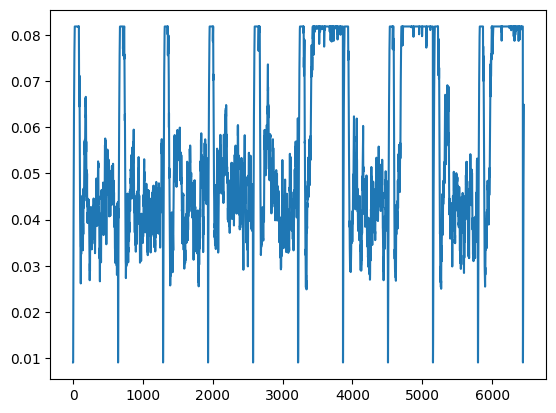

In [4]:
y_axis = a.history_smp[:,4] 
x_axis= np.arange(len(y_axis))

import matplotlib.pyplot as plt 

plt.plot(x_axis, y_axis) 
plt.show()

In [13]:
len(y_axis)

500036

In [20]:
CEC17_benchmark.get_10tasks_benchmark()[0]

In [14]:
a = loadModel("RESULTS/result/GECCO20/check/SMP_MFEA_SBX_230523_1400/2.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0], set_attribute= True)

In [27]:
a = loadModel("./RESULTS/result/GECCO20/check/SMP_MFEA_SBX_230523_1400/multiparent.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0], set_attribute= True)

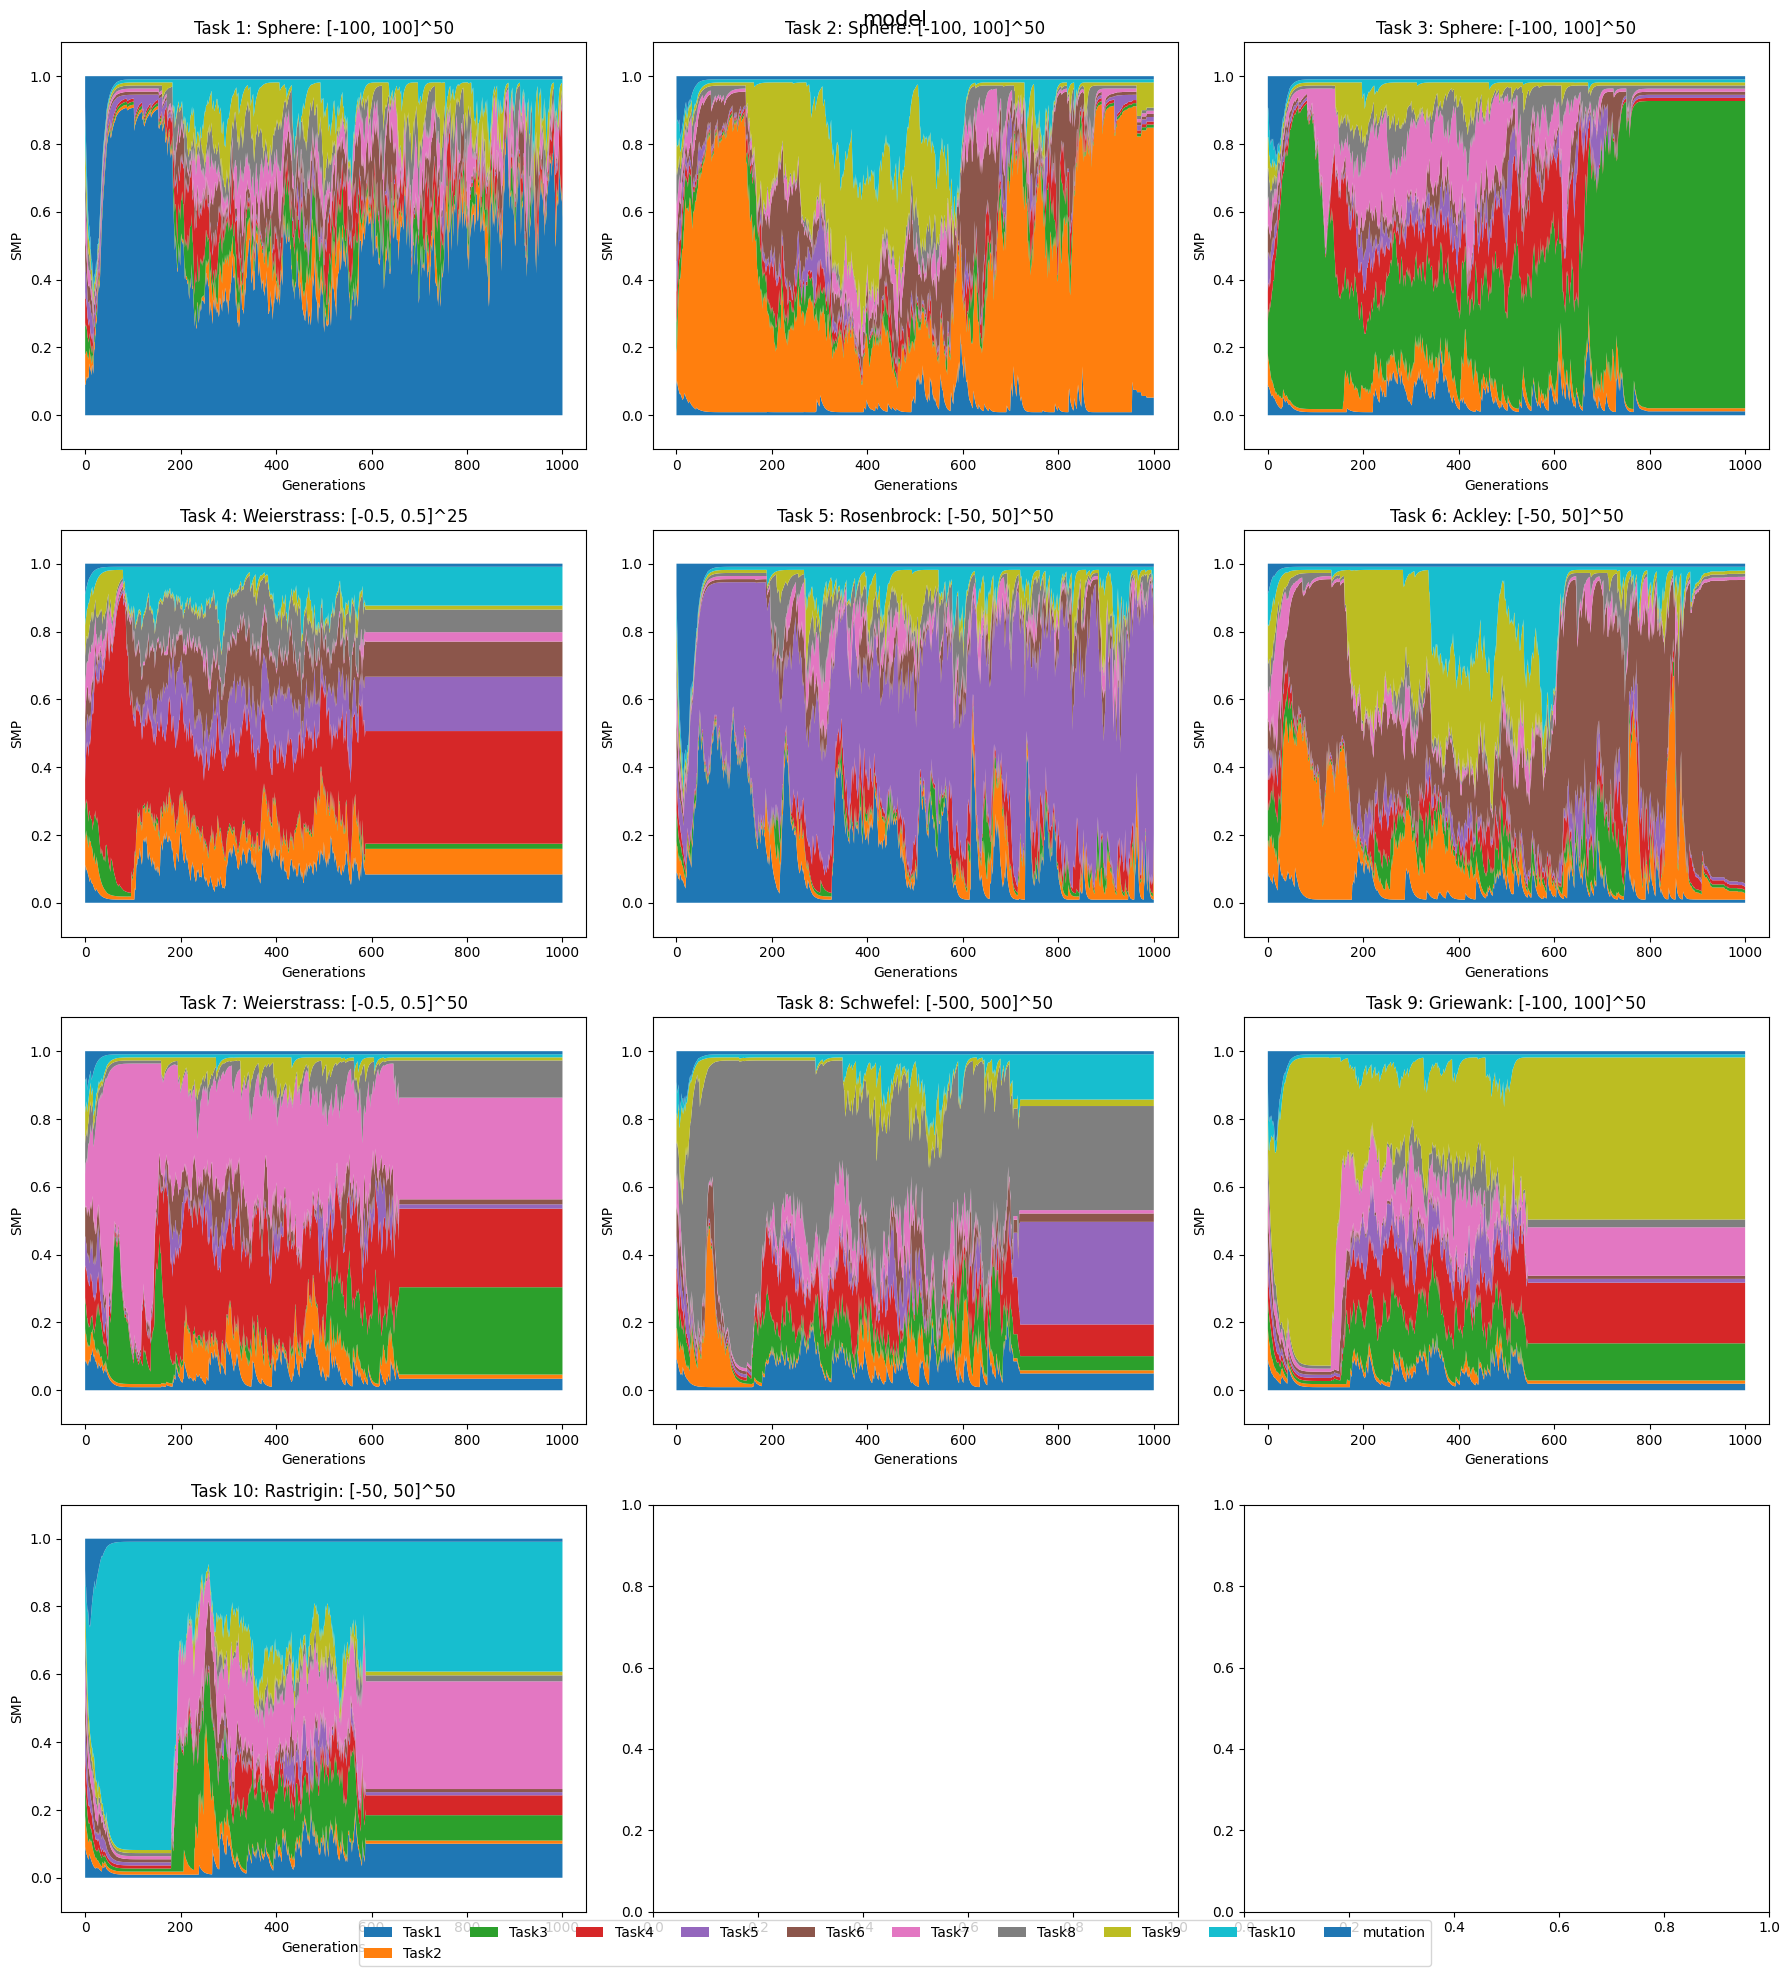

In [28]:
a.ls_model[0].render_smp()

## Analysis benchmark

In [2]:
ls_tasks = WCCI22_benchmark.get_50tasks_benchmark(6)[0]

In [2]:
global_optima_all =np.load("global_optimal_all_WCCI22.npy")

In [5]:
print(global_optima_all[1][:, 0])

[0.48186906 0.46522193 0.44931803 0.48479707 0.48101441 0.41884315
 0.4837807  0.40707325 0.48237424 0.44824699 0.43862819 0.38875292
 0.434452   0.39469425 0.43038043 0.40082444 0.4680433  0.43212399
 0.38814725 0.46059308 0.39714838 0.45232342 0.41722458 0.44373302
 0.45726472 0.43755827 0.46036566 0.41570222 0.40975957 0.46161291
 0.48510498 0.48282334 0.47966351 0.43123926 0.431392   0.46163117
 0.4390869  0.4834944  0.46738346 0.46989454 0.46604098 0.3953819
 0.39334057 0.41758314 0.41774029 0.40779081 0.47146029 0.46308275
 0.43934141 0.41455082]


In [7]:
print(global_optima_all[1][4, :])

[0.48101441 0.46551729 0.52528117 0.55596914 0.50423235 0.54155424
 0.48056698 0.54413248 0.50539338 0.46309909 0.47721881 0.48318426
 0.47842663 0.48494284 0.54650757 0.46057955 0.49003643 0.51178197
 0.47348814 0.47655322 0.4659892  0.49014299 0.51039068 0.53310847
 0.45787414 0.52535153 0.53642923 0.47284343 0.50119327 0.49463252
 0.50916198 0.47239385 0.53010708 0.49686298 0.47268676 0.50863384
 0.45613609 0.45596108 0.54383831 0.47669686 0.51408129 0.49549441
 0.47417614 0.52758562 0.46530174 0.53477487 0.49387598 0.46221711
 0.5377094  0.51642374]


In [14]:
dim = 42
print(global_optima_all[2][:, 0])
print(global_optima_all[1][:, dim][13])

[0.54027028 0.54211368 0.51729121 0.54248652 0.5275975  0.54699766
 0.53115434 0.4621149  0.49393057 0.48638471 0.46684875 0.48418813
 0.45125153 0.499643   0.45494237 0.53563835 0.52487455 0.49755394
 0.53427537 0.48411431 0.5092124  0.46262417 0.51400915 0.53678066
 0.54715856 0.54383475 0.53909843 0.54093986 0.49556017 0.45283498
 0.46574555 0.5085719  0.5439897  0.49319559 0.51623787 0.45483905
 0.46910168 0.54141977 0.47255207 0.53941825 0.48879418 0.53806202
 0.50672558 0.47516102 0.48900736 0.47270964 0.49676046 0.47794994
 0.52914434 0.53074712]
0.5362230684384449


In [88]:
print(np.min(global_optima_all))

-2.3522195406384587


In [92]:
for ID in range(1, 11):
    ls_tasks = WCCI22_benchmark.get_50tasks_benchmark(ID)[0]
    print("ID: ", ID)
    for idx_task in range(50):
        fitness = (ls_tasks[idx_task](global_optima_all[ID - 1][idx_task]))
        if np.max(global_optima_all[ID-1][idx_task]) > 1 :
            print("[INFO]:value out of range (0, 1); idx_task: ", idx_task, " ", ls_tasks[idx_task], " value: ", np.max(global_optima_all[ID-1][idx_task]))
        if np.min(global_optima_all[ID-1][idx_task]) < 0: 
            print("[INFO]:value out of range (0, 1); idx_task: ", idx_task, " ", ls_tasks[idx_task], " value: ", np.min(global_optima_all[ID-1][idx_task]))
        if fitness < 1e-6 or fitness == 0.0006363918619172182: 
            continue 
        print("idx_task: ", idx_task)

ID:  1
ID:  2
ID:  3
ID:  4
ID:  5
ID:  6
[INFO]:value out of range (0, 1); idx_task:  2   <pyMSOO.MFEA.benchmark.continous.funcs.Schwefel object at 0x00000299DE139810>  value:  1.0331494089775861
[INFO]:value out of range (0, 1); idx_task:  2   <pyMSOO.MFEA.benchmark.continous.funcs.Schwefel object at 0x00000299DE139810>  value:  -2.2472242143688437
[INFO]:value out of range (0, 1); idx_task:  5   <pyMSOO.MFEA.benchmark.continous.funcs.Schwefel object at 0x00000299DDC174C0>  value:  1.081278337977586
[INFO]:value out of range (0, 1); idx_task:  5   <pyMSOO.MFEA.benchmark.continous.funcs.Schwefel object at 0x00000299DDC174C0>  value:  -2.1067993960688436
[INFO]:value out of range (0, 1); idx_task:  8   <pyMSOO.MFEA.benchmark.continous.funcs.Schwefel object at 0x00000299DDC1B100>  value:  1.0267576089775863
[INFO]:value out of range (0, 1); idx_task:  8   <pyMSOO.MFEA.benchmark.continous.funcs.Schwefel object at 0x00000299DDC1B100>  value:  -2.1273729553688434
[INFO]:value out of range 

In [64]:
for i in range(50):
    result = (global_optima[i] - global_optima[1])
    print(result)
    print(np.max(result))

[ 0.01664713 -0.07536678  0.03008991  0.05800655 -0.01421789  0.03689556
 -0.05278376 -0.01505003  0.06663451 -0.0065574   0.04602205  0.00138008
  0.04211356 -0.07628197  0.07644501 -0.02191666 -0.00041993  0.04699811
 -0.0085687   0.02907478 -0.05155537  0.02397411 -0.00380822 -0.0314366
 -0.02101673 -0.02118558 -0.00253421  0.032288    0.06279343  0.01552401
 -0.02854525  0.0075481   0.04290226  0.02261364  0.00422322 -0.02360287
  0.08500898 -0.02877577  0.01501359 -0.02359624 -0.04819206 -0.02296879
  0.03586359 -0.03166505 -0.01380729  0.08776951 -0.04068899  0.03411793
 -0.06970283  0.05589715]
0.08776951100000002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
0.0
[-0.0159039  -0.00395903  0.04904391  0.06127444  0.00139299 -0.02177538
 -0.0090833  -0.03632658  0.01132385  0.01014783  0.02139408  0.02923856
 -0.01150464 -0.04486039  0.01501682 -0.00621104  0.0735393  -0.032

In [41]:
for ID in range(1,11):
    global_optima = np.load(f"./global_optima_WCCI22_ID_{ID}.npy")
    for i in range(50):
        a = global_optima[:, i]
        # print(a)
        # a = np.round(a, decimals= 3)
        if (len(set(a))) != 50: 
            print(ID)


In [11]:
ls_tasks[0](ls_tasks[0].global_optimal)

63317675364559.64

In [ ]:
ls_tasks[0].encode(
    ls_tasks[0].inv_rotation_matrix @ ls_tasks[0].global_optimal
)

## Analsys

In [1]:
import numpy as np 
average_success = np.load("./avarage_success.npy")
count_success = np.load("./ls_count_success.npy")
count_delta = np.load("./ls_count_Delta.npy")

In [ ]:
idx = 200 

In [10]:
loop = True 

steps = 50 
idx_task =5
idx = 500
print(len(average_success))
print(average_success[idx: idx + steps, idx_task])


2037
[[0.05263157 0.03333332]
 [0.         0.03571427]
 [0.03571427 0.11764702]
 [0.05555554 0.14285709]
 [0.05882351 0.03333332]
 [0.         0.03571427]
 [0.0833333  0.04347825]
 [0.10714282 0.08333331]
 [0.12499996 0.12499996]
 [0.04545452 0.05263157]
 [0.04999999 0.        ]
 [0.13157891 0.03571427]
 [0.06249998 0.04166665]
 [0.06521738 0.14999993]
 [0.07999998 0.02941176]
 [0.05999999 0.        ]
 [0.05357142 0.        ]
 [0.06666666 0.07142852]
 [0.01785714 0.05555552]
 [0.07692306 0.05555552]
 [0.06666666 0.        ]
 [0.04545454 0.        ]
 [0.05172413 0.12499984]
 [0.11538459 0.        ]
 [0.03703703 0.09999995]
 [0.11764702 0.        ]
 [0.04347825 0.        ]
 [0.03125    0.        ]
 [0.12962961 0.        ]
 [0.05172413 0.2999997 ]
 [0.09259258 0.04999998]
 [0.0869565  0.        ]
 [0.02173913 0.        ]
 [0.19999996 0.        ]
 [0.27777773 0.08333326]
 [0.22727268 0.24999969]
 [0.30357137 0.        ]
 [0.23999995 0.37499977]
 [0.30357137 0.24999969]
 [0.37096768 0.21428

In [15]:
import numpy as np
average_rate_success_das =  np.load("./avarage_success._w_Das.npy") 
average_rate_success_no_das = np.load("./avarage_success_sbx_wo_Das.npy")
average_multi_parent = np.load("./avarage_success.npy")

In [2]:
print(len(average_rate_success_das))
print(len(average_rate_success_no_das))
print(len(average_multi_parent))

2037
2037
2037


In [95]:
a = np.random.rand(224, 224, 3)
print(np.sum(a[2, :, 1])) 

116.73284953846434


In [97]:
from pyMSOO.utils.numba_utils import numba_randomchoice_w_prob

a = np.array([0.7, 0.2, 0.1])
print(numba_randomchoice_w_prob(a))

0


In [107]:
np.random.choice(a, replace= False)

0.2

In [14]:
avg_success_w_DaS = np.load("./avarage_success._w_Das.npy")
ls_count_delta_w_DaS = np.load("./ls_count_Delta.npy")
ls_count_success_w_Das = np.load("./ls_count_success.npy")

In [7]:
avg_success_multiparent = np.load("./avarage_success_multiparent.npy")
ls_count_delta_multiparent= np.load("./ls_count_Delta_multiparent.npy")
ls_count_success_multiparent = np.load("./ls_count_success_multiparent.npy")

In [66]:
print(np.sum(ls_count_delta_multiparent, axis=0)[4])
print(np.sum(ls_count_delta_w_DaS, axis= 0)[4])


[28432.  1018.  1104.   974. 59632.  1028.  1102.  1096.   878.  1048.
  3210.]
[30478.   924.   956.   908. 58754.   992.  1034.   980.  1010.  1144.
  2600.]


In [86]:
idx_task = 1
print(np.sum(np.sum(ls_count_delta_multiparent, axis=0)[idx_task]))

print(np.sum(np.sum(ls_count_delta_w_DaS, axis=0)[idx_task]))

99710.0
99742.0


In [21]:
idx_task = 9
print(np.sum(np.sum(ls_count_success_multiparent, axis=0)[idx_task]))

print(np.sum(np.sum(ls_count_success_w_Das, axis=0)[idx_task]))

10096.0
13034.0


In [20]:
idx = 200
steps = 1000
idx_task = 9
print(np.average(average_rate_success_das[idx:idx+steps], axis= 0)[idx_task])
# print(np.average(average_rate_success_no_das[idx:idx+steps], axis= 0)[idx_task])
print(np.average(average_multi_parent[idx:idx+steps], axis= 0)[idx_task])
# print(np.sum(np.average(average_multi_parent[idx:idx+steps], axis=0)[idx_task]) - np.average(average_multi_parent[idx:idx+steps], axis=0)[idx_task][idx_task])

[0.         0.03384008 0.1670369  0.         0.         0.02346375
 0.16643871 0.0005     0.         0.15331995 0.        ]
[0.0005     0.0592411  0.17994958 0.         0.00025    0.04556808
 0.16935831 0.0005     0.00091666 0.16779982 0.        ]


In [5]:
np.sum(np.average(average_multi_parent[idx:idx+100], axis=0))

0.9216917235680046

In [22]:
# for i in range(1000):
#     print(average_multi_parent[i][4].tolist())

In [11]:
np.average(average_rate_success_no_das[0:100], axis= 0)[4]

array([0.15930887, 0.00749997, 0.00736108, 0.0035    , 0.14350754,
       0.00271428, 0.00416666, 0.00513888, 0.00749999, 0.        ,
       0.13226731])

In [ ]:
for i in range(len(a.ls_model)):
    print(a.ls_model[i].history_cost[-1])

## Test code

In [70]:
mutation = PolynomialMutation(nm=5, pm=1)

mutation.__class__._mutate(
    np.array([0.1, 0.2, 0.3, 0.4, 0.5] * 10), 
    50, 
    pm= 1/50,
    nm=40
)


array([0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3,
       0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1,
       0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4,
       0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5])

In [24]:
import numpy as np 
PCD_pa = np.array([
    [1, 1, 1, 1], 
    [0.9, 0.9, 0.1, 0.1], 
    [0.1, 0.1, 0.9, 0.1], 
    [0.5, 0.5, 0.1, 0.2],
    [0.1, 0.1, 0.2, 0.9]
])
skf_pb = 1 
skf_pa = 0 
pcd_pa_pb = PCD_pa[skf_pb].copy()
pcd_pa = PCD_pa.copy()

    
# take skf_pc 
## compute mse_los -> take loss max
random_vector = np.random.rand(4)

print(random_vector)
idx_transfer_ab = random_vector < pcd_pa_pb  # [1, 0, 0, 1] => 
print(idx_transfer_ab)
if np.sum((1 - idx_transfer_ab)) > 0: # ton tai chieu khong transfer
    pcd_pa[0] *= 0 
    mse_loss = np.sum((pcd_pa * (1 - idx_transfer_ab)), axis= 1) / np.sum((1 - idx_transfer_ab))
    print(mse_loss)
    skf_pc = np.argmax(mse_loss)
else: 
    skf_pc = None
print(skf_pc) 
print(mse_loss[skf_pc])

[0.35965859 0.81065703 0.80912596 0.94506824]
[ True  True  True False]
[0.  0.1 0.1 0.2 0.1]
3


In [2]:
import numpy as np 
PCD_pa = np.array([
    [1, 1, 1, 1], 
    [0.9, 0.9, 0.1, 0.1], 
    [0.1, 0.1, 0.9, 0.1], 
    [0.5, 0.5, 0.1, 0.2],
    [0.1, 0.1, 0.2, 0.9]
]) 

transferred_dims = [2, 3]
PCD_pa[:, transferred_dims]= 0 
print(PCD_pa)

[[1.  1.  0.  0. ]
 [0.9 0.9 0.  0. ]
 [0.1 0.1 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.1 0.1 0.  0. ]]


In [6]:
print(np.sum(pcd_vector_skfpa, axis= 1)[[2,3]])

[0.2 1. ]


In [7]:
a = [1,2,3]
b = [4,2]
print(a + b)

[1, 2, 3, 4, 2]


In [11]:
a =  np.random.rand(50) < 0.5 
np.where(a)[0]

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11, 12, 13, 15, 16, 17, 20, 21,
       22, 23, 25, 26, 29, 32, 33, 35, 37, 38, 40, 42, 43, 44, 46, 47, 48,
       49])

In [5]:
pcd_vector_skfpa= PCD_pa 
print(pcd_vector_skfpa)
print(np.sum(pcd_vector_skfpa, axis= 1) / np.sum(pcd_vector_skfpa))

[[1.  1.  0.  0. ]
 [0.9 0.9 0.  0. ]
 [0.1 0.1 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.1 0.1 0.  0. ]]
[0.38461538 0.34615385 0.03846154 0.19230769 0.03846154]


In [17]:
import numpy as np 
x_en = "0.9	0.1	0.9	0.1	0.9	0.5	0.1	0.5	0.1	0.5".split("\t")
x_en = np.array(x_en, dtype= np.float64)
x_en = np.array(x_en) 
lower_bound, upper_bound =[-50, 50]

x = x_en * (upper_bound - lower_bound) + lower_bound
print(x)
print(",".join([str(round(i, 2)) for i in x]))

[ 40. -40.  40. -40.  40.   0. -40.   0. -40.   0.]
40.0,-40.0,40.0,-40.0,40.0,0.0,-40.0,0.0,-40.0,0.0


array([0.5, 2.5, 0.5, 2.5, 0.5, 2.5, 0.5, 2.5, 0.5, 2.5])

In [56]:

import numpy as np 
x_en = "0.1	0.5	0.1	0.5	0.1	0.1	0.9	0.1	0.9	0.1".split("\t")*5
x_en = np.array(x_en, dtype= np.float64)
x_en = np.array(x_en) 
tasks = CEC17_benchmark.get_10_tasks_benchmark_ver_complicate()[0][1]
print(tasks(x_en))

500000.0


In [ ]:
0.1	0.5	0.1	0.5	0.1	0.5	0.1	0.5	0.1	0.5
0.9	0.1	0.9	0.1	0.9	0.1	0.9	0.1	0.9	0.1


In [23]:
import numpy as np 
x_de = [40.0,-30.0,30.0,0.0,-40.0,0.0,20.0,10.0,20.0,0.0]
x_de = np.array(x_de) 
lower_bound, upper_bound =[-50, 50]
x_en = (x_de - lower_bound) / (upper_bound - lower_bound)
print(",".join([str(round(i, 2)) for i in x_en]))

0.9,0.2,0.8,0.5,0.1,0.5,0.7,0.6,0.7,0.5


In [13]:
x = "0.88 0.62 0.75 0.35 0.27 0.9 0.43 0.96 0.66 0.62"
x = x.split(" ")
print(", ".join([str(i) for i in x]))

0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62


In [13]:
x -= 1 

In [18]:
print(",".join([str(int(i)) for i in x]))

40,0,-80,0,-20,0,-60,80,40,20


In [79]:
a = a = loadModel("RESULTS2/compare_old_vs_new/SM_MFEA_DaS_rand_percent_00/8.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(3)[0])
for model in a.ls_model: 
    print(model.history_cost[-1])

[45.27035036296619, 9.445644266747877e-11, 58.7025188314185, 6.608236180483118e-11, 15.967745423200583, 47.74183452423706, 4.665112740553923e-11, 356.8468274672217, 2.5392243863109343e-11, 18.50241071123098, 47.656472847458375, 2.531308496145357e-14, 112.71005552848538, 3.838284134971559e-10, 19.74865901611068, 47.881551285202356, 2.886579864025407e-14, 52.73301794012576, 7.137226365472316e-10, 15.992962159263868, 48.28960956480537, 4.515543494676422e-11, 42.91471059519148, 6.721478928994884e-11, 12.090396632310302, 47.0545045241417, 2.5654589563828267e-11, 56.71799503573487, 3.555045147152214e-10, 20.71475113682874, 47.0250497168417, 1.545874539488068e-12, 63.768236015752905, 2.0006107881442858e-11, 14.931349122934364, 4081.8117433578755, 2.886579864025407e-14, 66.66292666903996, 4.628566641073917e-09, 15.362073297435444, 46.07424797717167, 3.7271963293505905e-11, 57.7075850088583, 1.2161494034046427e-11, 14.488598661495871, 207.44075461407564, 6.370459715299148e-12, 362.2277763305659

0.54027028 0.54211368 0.51729121 0.54248652 0.5275975  0.54699766
 0.53115434 0.4621149  0.49393057 0.48638471 0.46684875 0.48418813
 0.45125153 0.499643   0.45494237 0.53563835 0.52487455 0.49755394
 0.53427537 0.48411431 0.5092124  0.46262417 0.51400915 0.53678066
 0.54715856 0.54383475 0.53909843 0.54093986 0.49556017 0.45283498
 0.46574555 0.5085719  0.5439897  0.49319559 0.51623787 0.45483905
 0.46910168 0.54141977 0.47255207 0.53941825 0.48879418 0.53806202
 0.50672558 0.47516102 0.48900736 0.47270964 0.49676046 0.47794994
 0.52914434 0.53074712]

In [3]:
import numpy as np 
std = [1e-10]*10
mean = [0.1] * 10
mean[4] = 0.54211368
std[4] = 1e-10
mean[0] = 0.54248652 
std[0] = 1e-10
print(np.log((std[4] + 1e-50)/(std[0] + 1e-50)))
print(((mean[0] - mean[4]) ** 2)/(2 + 1e-50))
a = ((std[0])**2 + (mean[0] - mean[4]) ** 2 )/(2 * (std[4])**2 + 1e-50)
print(a)
print(np.exp(-a * 10 ** (-1)))



0.0
6.950483279997386e-08
6950483279997.886
0.0


In [6]:
i, j = 4, 0
mean[4] = 0.5412
std[4] = 1e-5
mean[0] = 0.48037 
std[0] = 1e-5
kl = np.log((std[i] + 1e-7)/(std[j] + 1e-7)) + (std[j] **2 + (mean[j] - mean[i]) ** 2+ 1e-7)/(2 * std[i] ** 2 + 1e-7) - 1/2
print(kl)
print(np.exp(-kl * 10 ** (-3.)))

(0.49900199601077255+9108.079645146832j)
(-0.9497947740759364-0.31127541018585797j)


In [8]:
-a * 10 ** (-1)

-100.0979980400394

In [3]:
10 ** -3

0.001

In [ ]:
0.8 0.97 0.31 0.69 0.88 0.89 0.09 0.04 0.17 0.88

In [40]:
a = np.array([1,2,4])
print(np.max(a, 2))

AxisError: axis 2 is out of bounds for array of dimension 1

In [6]:
import numpy as np 

a = np.array([0.9, 0.01, 0.2])
a = a ** 2
print(a / np.sum(a))

[9.52829079e-01 1.17633220e-04 4.70532878e-02]
